In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
patents=pd.read_csv('../patents/q2_patents_topics.csv', index_col='code') 
patents['Year'] = patents['publication date'].str[:4]
patents['publication date'] = pd.to_datetime(patents['publication date'])
patents['doctype'] = ['patent' for i in patents.index]
patents.head()

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link,representative figure link,code.1,citations,abstract,class,topic,Year,doctype
code,,,,,,,,,,,,,,,,,
KR100866792B1,KR-100866792-B1,Method and apparatus for generating face descr...,삼성전자주식회사,"문영수, 박규태, 자오지아리, 황산성, 황원준",2007-01-10,2007-01-10,2008-11-04,2008-11-04,https://patents.google.com/patent/KR100866792B...,https://patentimages.storage.googleapis.com/b5...,KR100866792B1,"['US20150178547A1', 'KR100707195B1', 'EP171651...",\n\n (Extended Local Binary Pattern) ...,G06,6,2008,patent
KR100703693B1,KR-100703693-B1,System and method for face recognition,삼성전자주식회사,"김정배, 이종하",2005-01-13,2005-01-13,2007-04-05,2007-04-05,https://patents.google.com/patent/KR100703693B...,https://patentimages.storage.googleapis.com/5a...,KR100703693B1,"['US10728242B2', 'US8433922B2', 'US9122913B2',...","\n\n , , , ...",G06,6,2007,patent
US9396319B2,US-9396319-B2,Method of criminal profiling and person identi...,"Laird H. Shuart, Marcia L Shuart, Sharon E Jan...","Laird H. Shuart, Marcia L Shuart, Sharon E Jan...",2013-09-30,2014-09-24,2016-07-19,2016-07-19,https://patents.google.com/patent/US9396319B2/en,https://patentimages.storage.googleapis.com/ff...,US9396319B2,[],\nA method of criminal profiling and person id...,G06,7,2016,patent
KR100846500B1,KR-100846500-B1,Method and apparatus for recognizing face usin...,삼성전자주식회사,"기석철, 문영수, 박규태, 이종하, 황산성, 황원준",2006-11-08,2006-11-08,2008-07-17,2008-07-17,https://patents.google.com/patent/KR100846500B...,https://patentimages.storage.googleapis.com/c9...,KR100846500B1,"['US10565433B2', 'US20110135166A1']","\n\n (Gabor Wavelet Features) , ...",G06,6,2008,patent
US9847974B2,US-9847974-B2,Image document processing in a client-server s...,Xerox Corporation,Pramod Sankar Kompalli,2016-04-28,2016-04-28,2017-12-19,2017-12-19,https://patents.google.com/patent/US9847974B2/en,https://patentimages.storage.googleapis.com/26...,US9847974B2,"['US9767381B2', 'US10410353B2', 'US20170243317...",\nDisclosed are devices and methods for proces...,H04,6,2017,patent


In [86]:

articles = pd.read_csv('../papers/q2_scopus_topics.csv',index_col='EID')
articles['doctype'] = ['article' for i in articles.index]
articles.head()

,Year,Cited by,Link,Abstract,EID.1,topic,doctype
EID,,,,,,,
85099418104,2021,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Generally, the decision rule for classifying u...",85099418104,6,article
85099378785,2021,NaN,https://www.scopus.com/inward/record.uri?eid=2...,This survey explores how Deep Learning has bat...,85099378785,6,article
85094573545,2021,NaN,https://www.scopus.com/inward/record.uri?eid=2...,The way electorates were influenced to vote fo...,85094573545,7,article
85100650454,2021,NaN,https://www.scopus.com/inward/record.uri?eid=2...,This study is informed by two research gaps. O...,85100650454,0,article
85101111750,2021,NaN,https://www.scopus.com/inward/record.uri?eid=2...,"Over recent years, the development of online s...",85101111750,0,article


In [87]:
docs = patents[['Year','topic','doctype']].append(articles[['Year','topic','doctype']])
docs

,Year,topic,doctype
KR100866792B1,2008,6,patent
KR100703693B1,2007,6,patent
US9396319B2,2016,7,patent
KR100846500B1,2008,6,patent
US9847974B2,2017,6,patent
...,...,...,...
85096716723,2020,3,article
85090341003,2020,0,article
85081137773,2020,0,article
85081685033,2020,7,article


# Some Counting

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  Returns self.


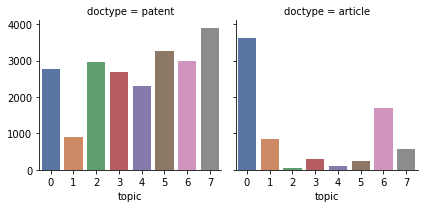

In [88]:
g = sns.FacetGrid(docs, col="doctype")
g.map(sns.countplot,'topic', palette='deep')


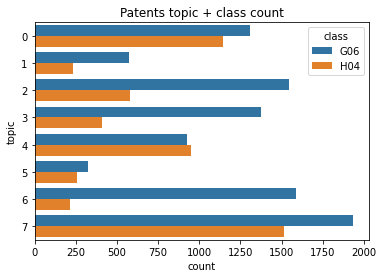

In [89]:
ax = sns.countplot(y="topic", hue="class", data=patents).set_title("Patents topic + class count")

In [90]:
patents['Year'] = pd.DatetimeIndex(patents['publication date']).year

In [91]:
articlesCntByYear = articles.groupby(['topic', 'Year']).size().reset_index(name='counts')

In [92]:
patentsTopicCntByYear = patents.groupby(['topic', 'Year']).size().reset_index(name='counts')
patentsClassCntByYear = patents.groupby(['class', 'Year']).size().reset_index(name='counts')

In [93]:
patentsClassCntByYear

,class,Year,counts
0,G06,1977,1
1,G06,1985,1
2,G06,1986,1
3,G06,1987,1
4,G06,1988,1
...,...,...,...
66,H04,2017,424
67,H04,2018,590
68,H04,2019,1018
69,H04,2020,1713


In [94]:
articlesCntByYear = articlesCntByYear[articlesCntByYear['Year'] != 2021]
patentsTopicCntByYear = patentsTopicCntByYear[patentsTopicCntByYear['Year'] != 2021]
patentsClassCntByYear = patentsClassCntByYear[patentsClassCntByYear['Year'] != 2021]

# TREND ANALYSIS

 # Articles Trend

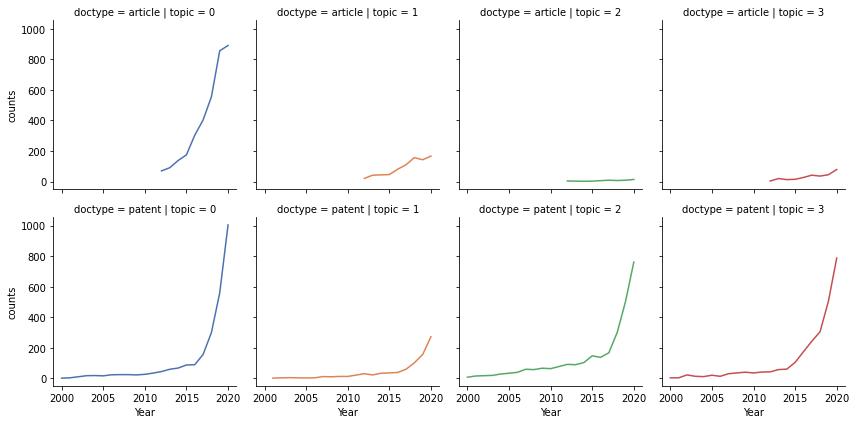

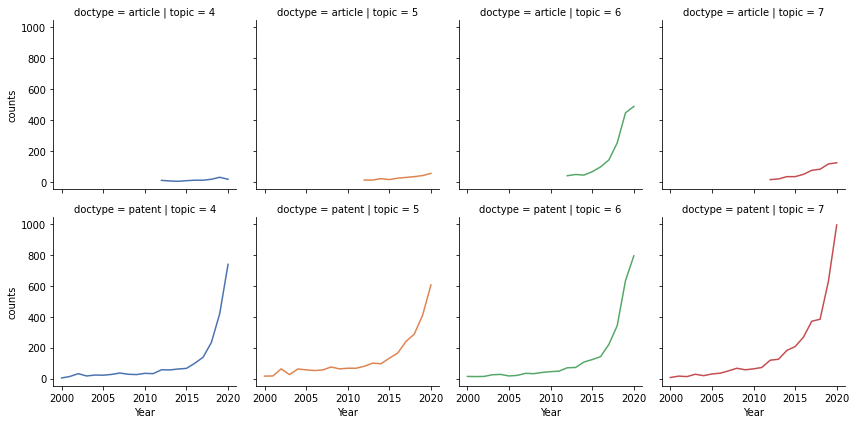

In [96]:
docs['Year'] = docs['Year'].astype(int)
docs_by_TypeTopicYear =  docs[(docs.Year>= 2000)&(docs.Year< 2021)&(docs.topic<4)].groupby(['doctype','topic', 'Year']).size().reset_index(name='counts')
g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
g.map(sns.lineplot,'Year','counts')

docs_by_TypeTopicYear =  docs[(docs.Year>= 2000)&(docs.Year< 2021)&(docs.topic>=4)].groupby(['doctype','topic', 'Year']).size().reset_index(name='counts')
g = sns.FacetGrid(docs_by_TypeTopicYear, row="doctype", col='topic',hue='topic',palette='deep')
g.map(sns.lineplot,'Year','counts')

#sns.lineplot(data=may_flights, x="year", y="passengers")

Text(0.5, 1.0, 'articles topic trend')

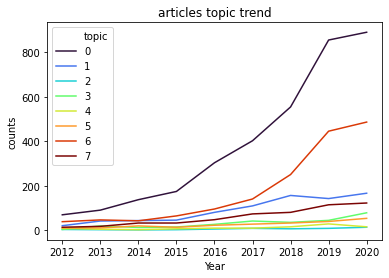

In [99]:
sns.lineplot(data=articlesCntByYear, x="Year", y="counts", hue="topic", legend="full", palette="turbo").set_title("articles topic trend")

# Patent Analysis 

Text(0.5, 1.0, 'patents topic trend')

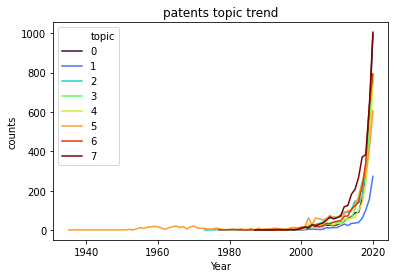

In [102]:
sns.lineplot(data=patentsTopicCntByYear, x="Year", y="counts", hue="topic", legend="full", palette="turbo").set_title("patents topic trend")

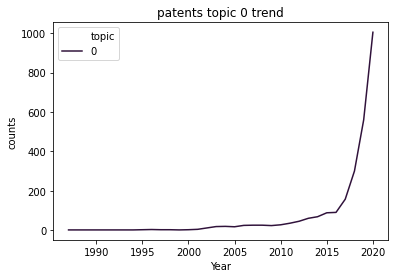

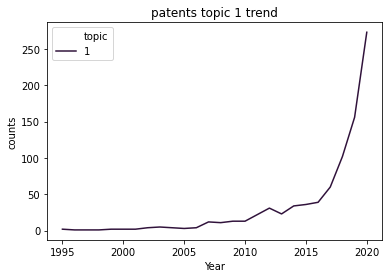

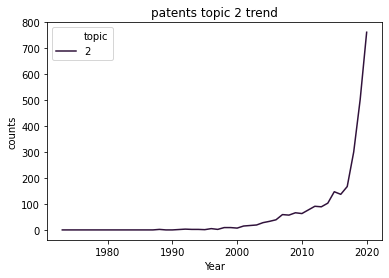

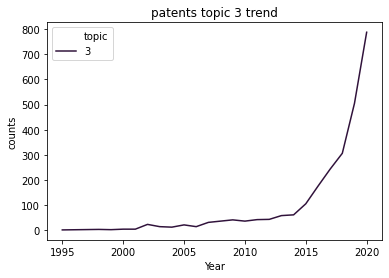

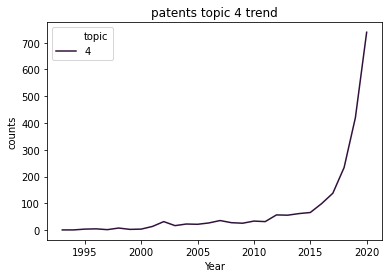

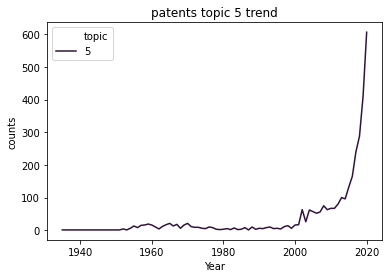

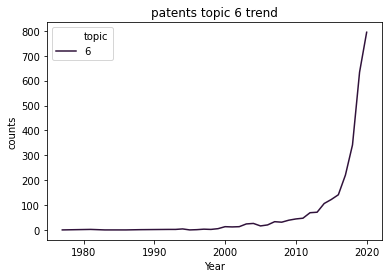

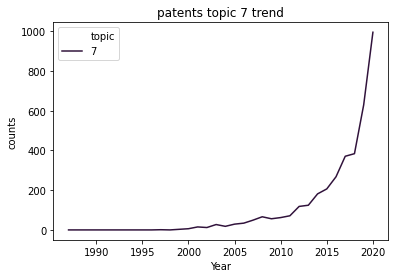

In [104]:
for i in range(8):
    plt.figure(i)
    s=sns.lineplot(data=patentsTopicCntByYear[patentsTopicCntByYear['topic'] == i], x="Year", y="counts", hue="topic", legend="full", palette="turbo").set_title("patents topic " + str(i) +" trend")

Text(0.5, 1.0, 'patents class trend')

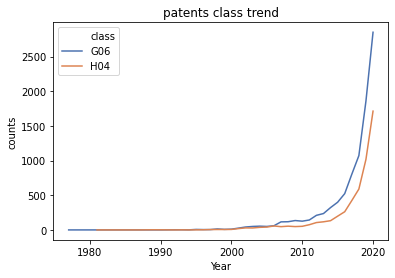

In [105]:
sns.lineplot(data=patentsClassCntByYear, x="Year", y="counts", hue="class", legend="full", palette="deep").set_title("patents class trend")

In [106]:
allDocumentsByYear = pd.concat([articlesCntByYear, patentsTopicCntByYear]).groupby(['topic', 'Year'],as_index=False).sum()
allDocumentsByYear

,topic,Year,counts
0,0,1987,1
1,0,1990,1
2,0,1991,1
3,0,1994,1
4,0,1996,3
...,...,...,...
271,7,2016,316
272,7,2017,445
273,7,2018,465
274,7,2019,744


# All Documents Analysis

Text(0.5, 1.0, 'all documents topic trend')

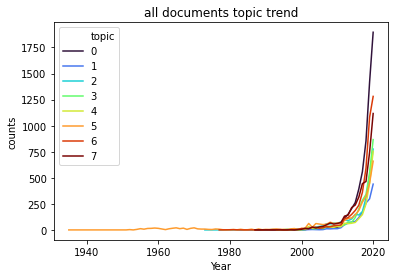

In [108]:
sns.lineplot(data=allDocumentsByYear, x="Year", y="counts", hue="topic", legend="full", palette="turbo").set_title("all documents topic trend")

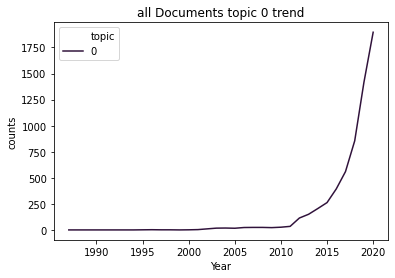

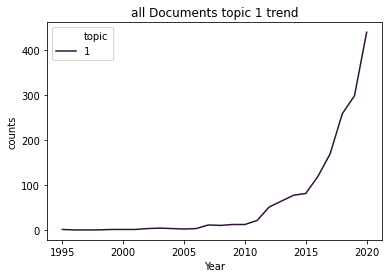

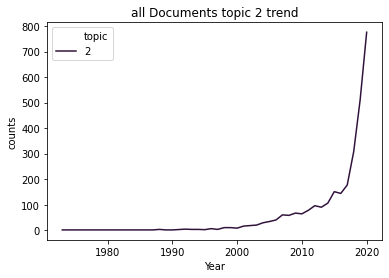

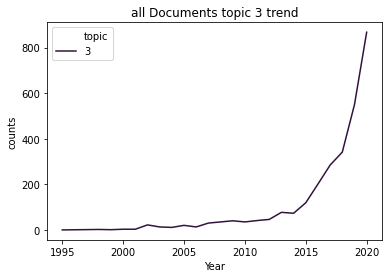

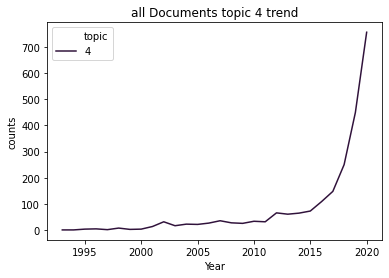

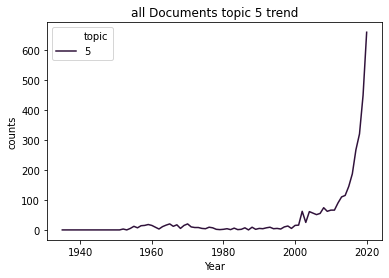

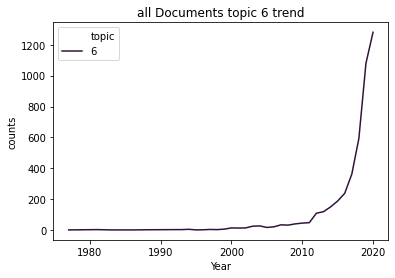

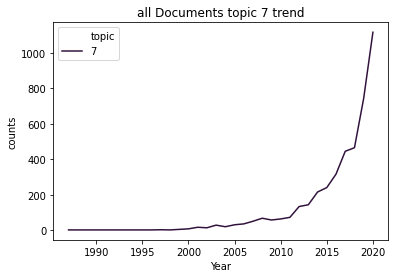

In [112]:
for i in range(8):
    plt.figure(i)
    s=sns.lineplot(data=allDocumentsByYear[allDocumentsByYear['topic'] == i], x="Year", y="counts", hue="topic", legend="full", palette="turbo").set_title("all Documents topic " + str(i) +" trend")